In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from math import factorial
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [8]:
import os
ruta_actual = os.getcwd()
print("Ruta actual:", ruta_actual)

Ruta actual: c:\Users\mitlalocelot\proyecto_10


In [9]:
video_game=pd.read_csv('C:/Users/mitlalocelot/proyecto_10/games.csv')

In [10]:
video_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
video_game.columns = video_game.columns.str.lower()
columns_to_replace = ['year_of_release']
for col in columns_to_replace:
     video_game[col].fillna(0000, inplace=True)
print(video_game["year_of_release"].isna().sum())

video_game['year_of_release'] =video_game['year_of_release'].astype('int')

0


C:\Users\mitlalocelot\AppData\Local\Temp\ipykernel_11736\2375176494.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  video_game[col].fillna(0000, inplace=True)


In [12]:
video_game['user_score'] =pd.to_numeric(video_game['user_score'],errors='coerce')
print(video_game.dtypes)

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [40]:
video_game[video_game["name"].isna()]

columns_to_replace = ['name']
for col in columns_to_replace:
     video_game[col].fillna("uknown", inplace=True)
print(video_game["name"].isna().sum())

0


In [41]:
columns_to_replace = ['genre']
for col in columns_to_replace:
     video_game[col].fillna("uknown", inplace=True)
print(video_game["genre"].isna().sum())

0


In [15]:
video_game["total_sales"]=video_game["na_sales"]+video_game["eu_sales"]+video_game["jp_sales"]+video_game["other_sales"]
print(video_game.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

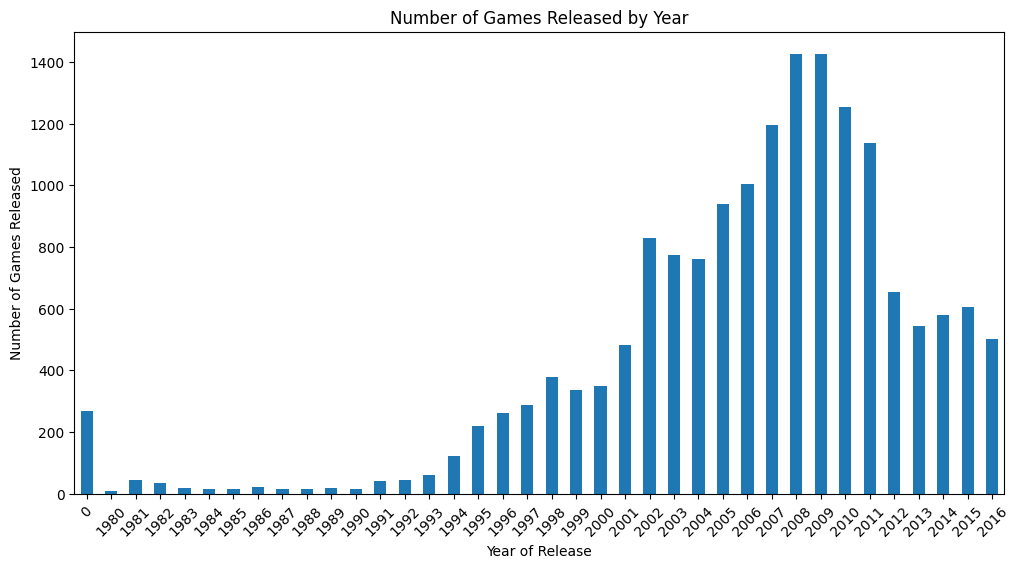

In [16]:
juegos_lanzados=video_game.groupby("year_of_release")["name"].count()
juegos_lanzados.head()
plt.figure(figsize=(12, 6))
juegos_lanzados.plot(kind='bar')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released by Year')
plt.xticks(rotation=45)
plt.show()

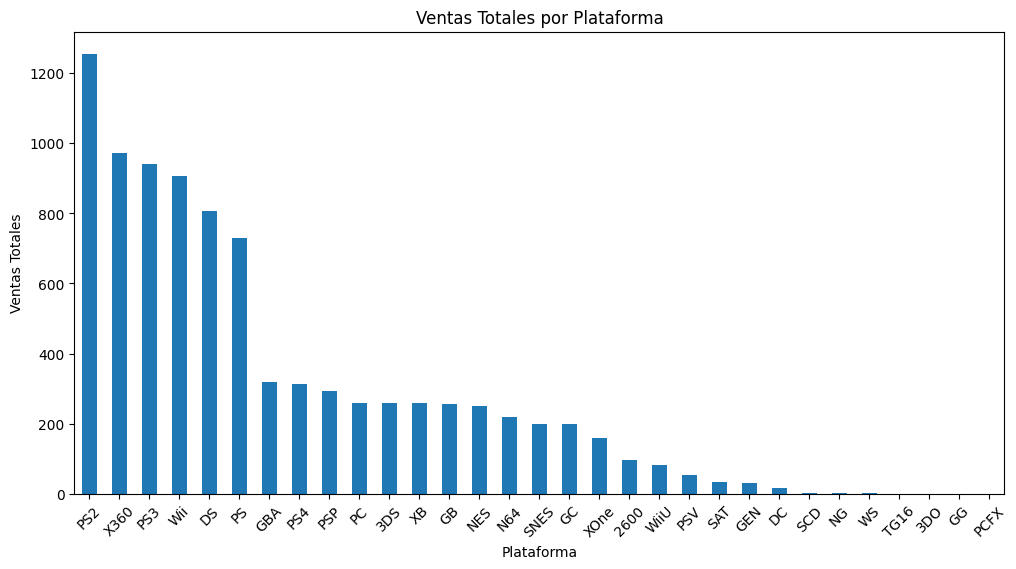

In [17]:
plataform=video_game.groupby("platform")["total_sales"].sum()
sales_plataform=plataform.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_plataform.plot(kind='bar')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Plataforma')
plt.xticks(rotation=45)
plt.show()

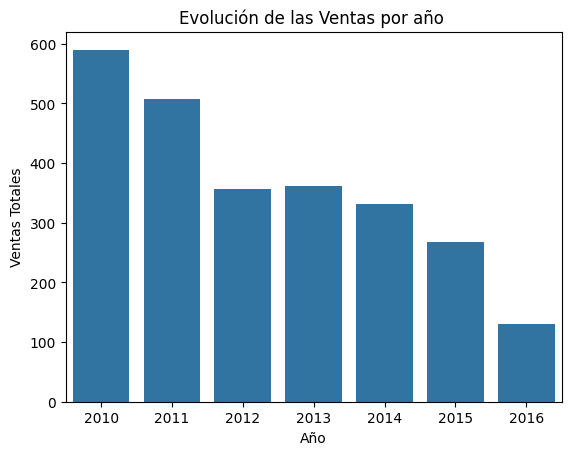

In [18]:
ventas_totales=video_game.groupby("year_of_release")["total_sales"].sum().reset_index()
plataforma=ventas_totales[ventas_totales["year_of_release"]>= 2010]
sns.barplot(x='year_of_release', y='total_sales',data=plataforma)
plt.title('Evolución de las Ventas por año ')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.show()


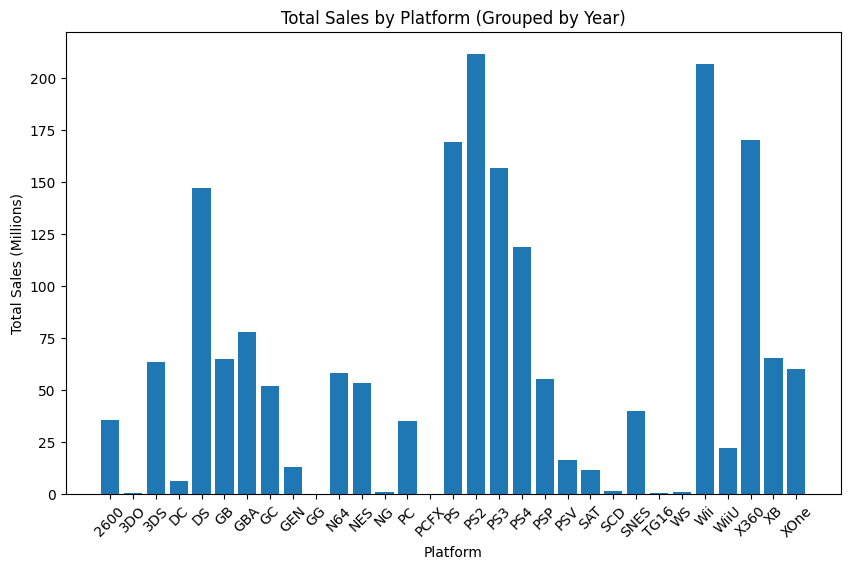

In [19]:
mejores_plataformas=video_game.groupby(["platform","year_of_release"])['total_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mejores_plataformas['platform'], mejores_plataformas['total_sales'])
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales by Platform (Grouped by Year)')
plt.xticks(rotation=45)
plt.show()

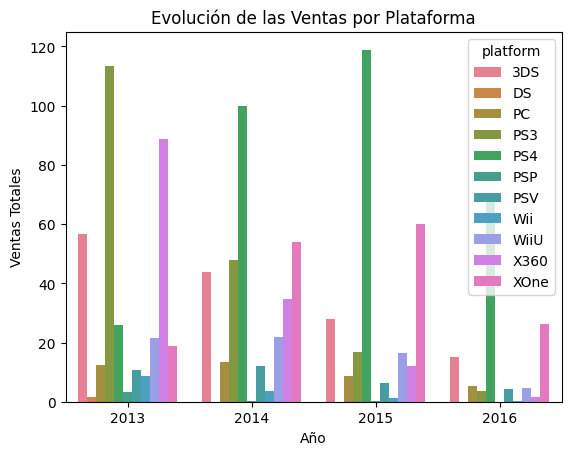

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None


In [20]:
mejores_plataformas=video_game.groupby(["platform","year_of_release"])['total_sales'].sum().reset_index()
plataformas_inactivas=mejores_plataformas[mejores_plataformas["year_of_release"]>= 2013]

sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=plataformas_inactivas)
plt.title('Evolución de las Ventas por Plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.show()



print(video_game.info())

In [21]:
mejores_plataformas=video_game.groupby(["platform","year_of_release"])['total_sales'].sum().sort_values(ascending=False).head(10)
print(mejores_plataformas)

platform  year_of_release
PS2       2004               211.81
Wii       2009               206.97
PS2       2002               205.38
          2003               184.31
Wii       2008               171.32
X360      2010               170.03
PS        1998               169.49
PS2       2001               166.43
          2005               160.66
PS3       2011               156.78
Name: total_sales, dtype: float64


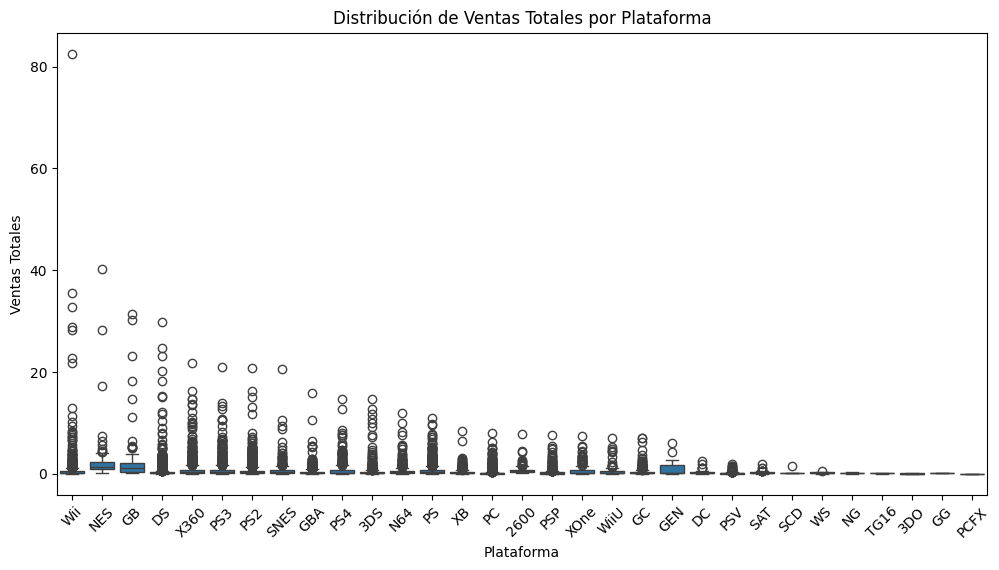

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales',data=video_game)
plt.title('Distribución de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='critic_score', ylabel='total_sales'>

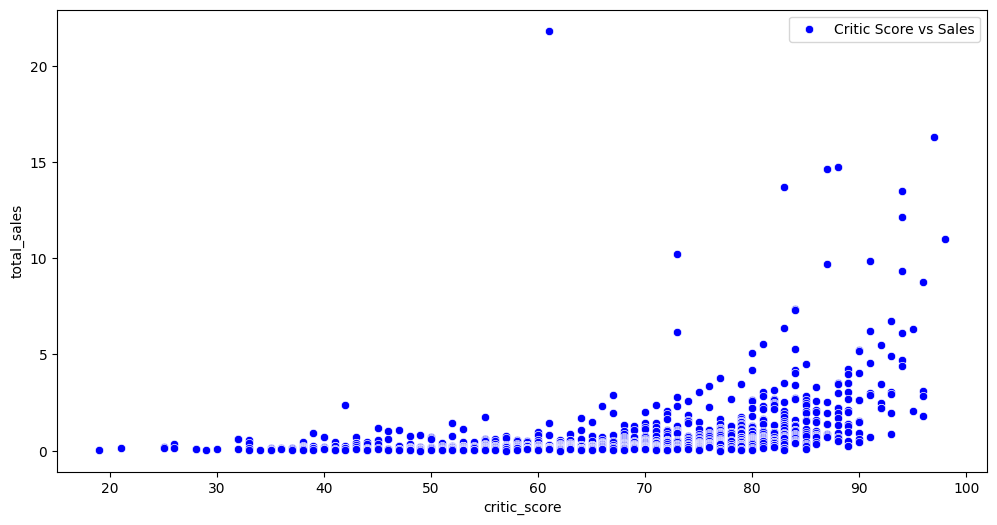

In [23]:
plataform_data=video_game[video_game["platform"]=="X360"]
platform_data = plataform_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=plataform_data,color='blue', label='Critic Score vs Sales')

<Axes: xlabel='user_score', ylabel='total_sales'>

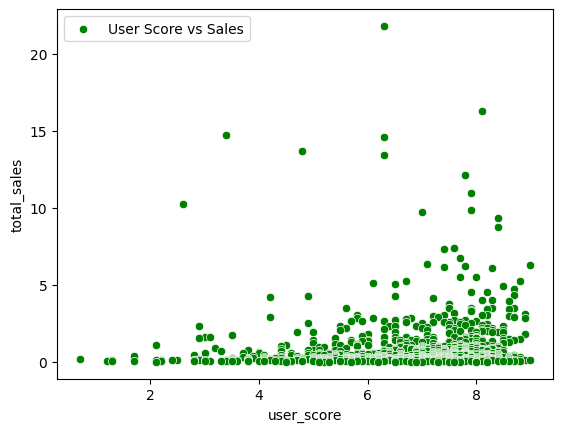

In [24]:
sns.scatterplot(x='user_score', y='total_sales', data=plataform_data, color='green', label='User Score vs Sales')


In [25]:
critic_correlation = plataform_data['critic_score'].corr(plataform_data['total_sales'])
user_correlation = plataform_data['user_score'].corr(platform_data['total_sales'])


print(f'Correlación entre las Reseñas de Críticos y las Ventas Totales:',critic_correlation)
print(f'Correlación entre las Reseñas de Usuarios y las Ventas Totales:',user_correlation)

Correlación entre las Reseñas de Críticos y las Ventas Totales: 0.3937358653072587
Correlación entre las Reseñas de Usuarios y las Ventas Totales: 0.11041150383472839


In [26]:
PS3_DATA=video_game[video_game["platform"]=="PS3"]
PS3_PLATAFORM=PS3_DATA.dropna(subset=['critic_score', 'user_score', 'total_sales'])

critic_PS3= PS3_DATA['critic_score'].corr(PS3_DATA['total_sales'])
user_PS3= PS3_DATA['user_score'].corr(PS3_DATA['total_sales'])


print(f'Correlación entre las Reseñas de Críticos y las Ventas Totales:',critic_PS3)
print(f'Correlación entre las Reseñas de Usuarios y las Ventas Totales:',user_PS3)

Correlación entre las Reseñas de Críticos y las Ventas Totales: 0.43243156856420595
Correlación entre las Reseñas de Usuarios y las Ventas Totales: 0.12669133936341698


In [27]:
wii_data=video_game[video_game["platform"]=="Wii"]
wii_plataform=wii_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

critic_wii=wii_data['critic_score'].corr(wii_data['total_sales'])
user_wii= wii_data['user_score'].corr(wii_data['total_sales'])


print(f'Correlación entre las Reseñas de Críticos y las Ventas Totales:',critic_wii)
print(f'Correlación entre las Reseñas de Usuarios y las Ventas Totales:',user_wii)

Correlación entre las Reseñas de Críticos y las Ventas Totales: 0.17755988806089953
Correlación entre las Reseñas de Usuarios y las Ventas Totales: 0.11241436067003177


In [28]:
pc_data=video_game[video_game["platform"]=="PC"]
pc_plataform=pc_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

critic_PC=pc_data['critic_score'].corr(pc_data['total_sales'])
user_PC= pc_data['user_score'].corr(pc_data['total_sales'])


print(f'Correlación entre las Reseñas de Críticos y las Ventas Totales:',critic_PC)
print(f'Correlación entre las Reseñas de Usuarios y las Ventas Totales:',user_PC)

Correlación entre las Reseñas de Críticos y las Ventas Totales: 0.2568867378948212
Correlación entre las Reseñas de Usuarios y las Ventas Totales: 0.010475684621486408


In [29]:
multiplatform_games =video_game.groupby('name')['platform'].nunique()



multiplatform_games = multiplatform_games[multiplatform_games > 1]


multiplatform_data = video_game[video_game['name'].isin(multiplatform_games.index)]


print(len(multiplatform_data))

sales_comparison = multiplatform_data.groupby(['name', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

sales_comparison = sales_comparison.reset_index()

print(sales_comparison.head())


7959
                     name platform  na_sales  eu_sales  jp_sales  other_sales  \
0    Frozen: Olaf's Quest      3DS      0.27      0.27       0.0         0.05   
1    Frozen: Olaf's Quest       DS      0.21      0.26       0.0         0.04   
2  007: Quantum of Solace       DS      0.11      0.01       0.0         0.01   
3  007: Quantum of Solace       PC      0.01      0.01       0.0         0.00   
4  007: Quantum of Solace      PS2      0.17      0.00       0.0         0.26   

   total_sales  
0         0.59  
1         0.51  
2         0.13  
3         0.02  
4         0.43  


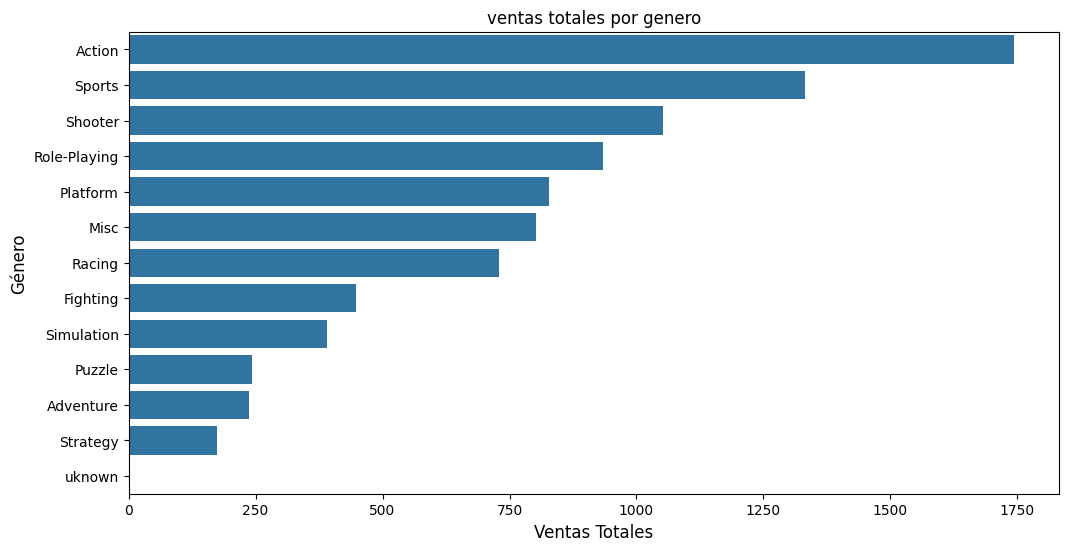

count      13.000000
mean      685.823846
std       503.243809
min         2.420000
25%       242.570000
50%       728.670000
75%       934.560000
max      1744.170000
Name: total_sales, dtype: float64


In [30]:
gameofgenre=video_game.groupby("genre")["total_sales"].sum().reset_index()

gameofgenre=gameofgenre.sort_values('total_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="total_sales",y="genre",data=gameofgenre)
plt.title("ventas totales por genero")
plt.xlabel('Ventas Totales', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.show()
gameofgenre=gameofgenre['total_sales'].describe()
print(gameofgenre)

In [31]:
def top_5_plataformas(video_game):
    
    plataform_na=video_game.groupby("platform")["na_sales"].sum()
    plataform_eu=video_game.groupby("platform")["eu_sales"].sum()
    plataform_jp=video_game.groupby("platform")["jp_sales"].sum()
    
    total_sale_na=video_game["na_sales"].sum()
    total_sale_eu=video_game["eu_sales"].sum()
    total_sale_jp=video_game["jp_sales"].sum()
    
    platform_market_na = (plataform_na / total_sale_na) * 100
    platform_market_eu = (plataform_eu / total_sale_eu) * 100
    platform_market_jp = (plataform_jp / total_sale_jp) * 100
    
    top_platforms_na = plataform_na.sort_values(ascending=False).head(5)
    top_platforms_eu = plataform_eu.sort_values(ascending=False).head(5)
    top_platforms_jp = plataform_jp.sort_values(ascending=False).head(5)
    
    platform_comparison = pd.DataFrame({
        'NA': platform_market_na[top_platforms_na.index],
        'EU': platform_market_eu[top_platforms_eu.index],
        'JP': platform_market_jp[top_platforms_jp.index]
    })
    
    
    
    print("Las 5 plataformas principales en América del Norte (NA)")
    print(top_platforms_na)
    print(platform_market_na[top_platforms_na.index])

    
    print("Las 5 plataformas principales en Europa (EU)")
    print(top_platforms_eu)
    print(platform_market_eu[top_platforms_eu.index])

    
    print("Las 5 plataformas principales en Japón (JP)")
    print(top_platforms_jp)
    print(platform_market_jp[top_platforms_jp.index])
    
    return platform_comparison

        
resultados = top_5_plataformas(video_game)
    
    

print(resultados)

Las 5 plataformas principales en América del Norte (NA)
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
platform
X360    13.685191
PS2     13.262008
Wii     11.287153
PS3      8.938181
DS       8.686270
Name: na_sales, dtype: float64
Las 5 plataformas principales en Europa (EU)
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
platform
PS2     13.993244
PS3     13.622060
X360    11.166880
Wii     10.814255
PS       8.809859
Name: eu_sales, dtype: float64
Las 5 plataformas principales en Japón (JP)
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
platform
DS      13.532762
PS      10.777188
PS2     10.729399
SNES     8.983559
3DS      7.759544
Name: jp_sales, dtype: float64
                 NA         EU         JP
platform                                 
3DS             NaN        NaN   7.7

In [32]:
def top_5_generos(video_game):
    
    genre_na=video_game.groupby("genre")["na_sales"].sum()
    genre_eu=video_game.groupby("genre")["eu_sales"].sum()
    genre_jp=video_game.groupby("genre")["jp_sales"].sum()
    
    total_sale_na=video_game["na_sales"].sum()
    total_sale_eu=video_game["eu_sales"].sum()
    total_sale_jp=video_game["jp_sales"].sum()
    
  
    
    top_genre_na = genre_na.sort_values(ascending=False).head(5)
    top_genre_eu = genre_eu.sort_values(ascending=False).head(5)
    top_genre_jp = genre_jp.sort_values(ascending=False).head(5)
    
    
    print("Las 5 generos principales en América del Norte (NA)")
    print(top_genre_na)
    
    print("Las 5 generos principales en Europa (EU)")
    print(top_genre_eu)
    
    print("Las 5 generos principales en Japón (JP)")
    print(top_genre_jp)
    
resultados = top_5_generos(video_game)
    
    

print(resultados)


Las 5 generos principales en América del Norte (NA)
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Las 5 generos principales en Europa (EU)
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Las 5 generos principales en Japón (JP)
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64
None


In [33]:
def analizar_esrb(video_game):
    
    sales_na=video_game.groupby("rating")["na_sales"].sum()
    sales_eu=video_game.groupby("rating")["eu_sales"].sum()
    sales_jp=video_game.groupby("rating")["jp_sales"].sum()
    
    esrb_sales_comparison = pd.DataFrame({
        'NA': sales_na,
        'EU': sales_eu,
        'JP': sales_jp
    })
    
    print("Ventas totales por clasificación ESRB en América del Norte (NA):")
    print(sales_na)

    print("\nVentas totales por clasificación ESRB en Europa (EU):")
    print(sales_eu)

    print("\nVentas totales por clasificación ESRB en Japón (JP):")
    print(sales_jp)

    print("\nComparación de ventas totales por clasificación ESRB en todas las regiones:")
    print(esrb_sales_comparison)

    return esrb_sales_comparison

resultados = analizar_esrb(video_game)

print(resultados)

Ventas totales por clasificación ESRB en América del Norte (NA):
rating
AO         1.26
E       1292.99
E10+     353.32
EC         1.53
K-A        2.56
M        748.48
RP         0.00
T        759.75
Name: na_sales, dtype: float64

Ventas totales por clasificación ESRB en Europa (EU):
rating
AO        0.61
E       710.25
E10+    188.52
EC        0.11
K-A       0.27
M       483.97
RP        0.08
T       427.03
Name: eu_sales, dtype: float64

Ventas totales por clasificación ESRB en Japón (JP):
rating
AO        0.00
E       198.11
E10+     40.20
EC        0.00
K-A       1.46
M        64.24
RP        0.00
T       151.40
Name: jp_sales, dtype: float64

Comparación de ventas totales por clasificación ESRB en todas las regiones:
             NA      EU      JP
rating                         
AO         1.26    0.61    0.00
E       1292.99  710.25  198.11
E10+     353.32  188.52   40.20
EC         1.53    0.11    0.00
K-A        2.56    0.27    1.46
M        748.48  483.97   64.24
RP         

In [35]:
xone_data=video_game[video_game['platform'] == 'XOne']["user_score"].dropna()


pc_data=video_game[video_game['platform'] == 'PC']["user_score"].dropna()


alpha=0.05

result=st.ttest_ind(xone_data,pc_data,equal_var=True)

print('valor p:',result.pvalue)# tu código: imprime el valor p obtenido)

if result.pvalue< alpha:
    print("Rechazamos la hipótesis nula")#Si el código imprime "Rechazamos la hipótesis nula", significa que hay evidencia estadística para concluir que las calificaciones de los usuarios entre las dos plataformas son diferentes
else:
    print("No podemos rechazar la hipótesis nula")#Por otro lado, si se imprime "No podemos rechazar la hipótesis nula", no hay suficiente evidencia para afirmar que existe una diferencia significativa.


valor p: 1.3896435533548819e-05
Rechazamos la hipótesis nula


In [36]:
xbox_var=xone_data.var()
pc_var =pc_data.var()

print("Varianza de Xbox one :",xbox_var)
print("Varianza de PC:",pc_var )


levene_test_result =levene(xone_data,pc_data,)

print("Estadístico de Levene:", levene_test_result.statistic)
print("p-valor:", levene_test_result.pvalue)

if levene_test_result.pvalue < 0.05:
    print("Las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente para afirmar que las varianzas son diferentes.")

Varianza de Xbox one : 1.9069968429360695
Varianza de PC: 2.3407871413372066
Estadístico de Levene: 1.2212506384014863
p-valor: 0.2693951512047048
No hay evidencia suficiente para afirmar que las varianzas son diferentes.


In [38]:
accion_data=video_game[video_game['genre'] == 'Action']["user_score"].dropna()

sport_data=video_game[video_game['genre'] == 'Sports']["user_score"].dropna()

alpha=0.05

result=st.ttest_ind(accion_data,sport_data,equal_var= False)

print('valor p:',result.pvalue)# tu código: imprime el valor p obtenido)

if result.pvalue< alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.11483818791498286
No podemos rechazar la hipótesis nula


In [39]:
accion_var= accion_data.var()
sport_var = sport_data.var()

print("Varianza de Action:", accion_var)
print("Varianza de Sports:", sport_var)

levene_result = levene(accion_data, sport_data)

print("Estadístico de Levene:", levene_result.statistic)
print("p-valor:", levene_result.pvalue)

if levene_result.pvalue < 0.05:
    print("Las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente para afirmar que las varianzas son diferentes.")

Varianza de Action: 2.031746898033205
Varianza de Sports: 2.5965147189730033
Estadístico de Levene: 14.132896085177192
p-valor: 0.0001736640672727649
Las varianzas son significativamente diferentes.


# conclusion general 

despues de revisar y analisar los datos de años pasados la campaña para 2017 esta lista fue importante ubicar analisar y determinar que hacer con los datos ausentes ya que podian representar un problema que nos llevaria a datos sesgados o erroneos, por otra parte,era necesario conocer las ventas totales de las diferentes regiones,NORTE AMERICA,EUROPA Y JAPON,se identifico cuales fueron los años con mas numeros de juegos lanzados estando en su pico mas alto 2008,2009 y 2010 reduciendo un poco los lanzamientos pero manteniendose estable en años siguientes otro punto importante es conocer cuales son las plataformas que mas han vendido para tener una referencia dentro de los cuales estan PS2, Wii, DS, Xbox 360 mientras que consolas mas antañas representan ventas mas bajas con el paso del tiempo las consolas se van haciendo obsoletas lo que al parecer representa ventas mas bajas por lo cual se identifico a las plataformas que dominan el actual mercado siendo ps4 y xbox one son las consolas de ultima generacion que destacan sobre los demas por sus altas ventas los generos mas rentables y demandados son es el de acccion seguido del sports y shoother que se encuentran presentes en las tres regiones siendo los juegos de aventura y estrategia los mas bajos y probablemente de nicho dentro de los multiples titulos y plataformas que se encuentran en el mercado se tiene que tomar en cuenta las criticas de los porfesionales y la de los usuarios para saber lo que piensan sobre los juegos en la cual se concluyo que las reseñas de críticos parecen tener una mayor influencia en las ventas totales en comparación con las reseñas de usuarios.en cada region los generos y las plataformas varian su popularidad siendo la plataforma xbox 360 en norte america la mas popular y el genero de accion,para la region de europa,la plataforma de ps2 es la mas popular y el genero accion predomina sobre los demas,para japon la plataforma mas popular es DS y su genero es el role play,la calsificacion de estos juegos la mas vendida es la M juegos dirigidos a un público adulto son los que más se venden.Esto puede explicarse por la mayor base de jugadores adultos y la mayor disponibilidad de ingresos para esta audiencia en conclusion las plataformas recientes son las que mas demanda tienen y las que se encuentran ya en el mercado representan cada ves menos ingresos los generos mas populares son aquellos que se ha posicionado con el tiempo y que representan una competividad y cooperacion esto podria explicarse con las campañas de marketing publicidad etc
